In [1]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras import applications
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import requests
from PIL import Image
import pandas as pd
import pickle

In [2]:
# dimensions of our images.
"""img_width, img_height = 224, 224

top_model_weights_path = 'bottleneck_fc_model.h5'
train_data_dir = 'images2/'
nb_train_samples = 16042
epochs = 50
batch_size = 1


def save_bottlebeck_features():
    asins = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    
    # build the VGG16 network
    model = applications.VGG16(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode=None,
        shuffle=False)

    for i in generator.filenames:
        asins.append(i[2:-5])

    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)
    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))
    
    np.save(open('workshop/models/16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)
    np.save(open('workshop/models/16k_data_cnn_feature_asins.npy', 'wb'), np.array(asins))
    

save_bottlebeck_features()"""

"img_width, img_height = 224, 224\n\ntop_model_weights_path = 'bottleneck_fc_model.h5'\ntrain_data_dir = 'images2/'\nnb_train_samples = 16042\nepochs = 50\nbatch_size = 1\n\n\ndef save_bottlebeck_features():\n    asins = []\n    datagen = ImageDataGenerator(rescale=1. / 255)\n    \n    # build the VGG16 network\n    model = applications.VGG16(include_top=False, weights='imagenet')\n    generator = datagen.flow_from_directory(\n        train_data_dir,\n        target_size=(img_width, img_height),\n        batch_size=batch_size,\n        class_mode=None,\n        shuffle=False)\n\n    for i in generator.filenames:\n        asins.append(i[2:-5])\n\n    bottleneck_features_train = model.predict_generator(generator, nb_train_samples // batch_size)\n    bottleneck_features_train = bottleneck_features_train.reshape((16042,25088))\n    \n    np.save(open('workshop/models/16k_data_cnn_features.npy', 'wb'), bottleneck_features_train)\n    np.save(open('workshop/models/16k_data_cnn_feature_asins.

In [3]:
bottleneck_features_train = np.load('16k_data_cnn_features.npy')
asins = np.load('16k_data_cnn_feature_asins.npy')

In [4]:
data = pd.read_pickle('16k_apperal_data_preprocessed')
df_asins = list(data['asin'])
asins = list(asins)

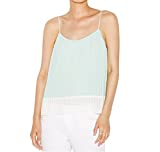

Product Title:  bar iii womens chiffon pleated casual top green 
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B01CDLVBX8


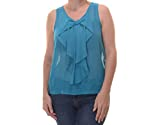

Product Title:  bcx teal sheer bow blouse size 
Euclidean Distance from input image: 34.431805
Amazon Url: www.amzon.com/dp/B014PROEB4


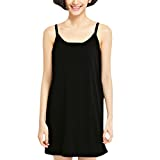

Product Title:  loose elastic condole belt vest skirt comfortable tank tops plussizeblack 
Euclidean Distance from input image: 35.527588
Amazon Url: www.amzon.com/dp/B014F88FN6


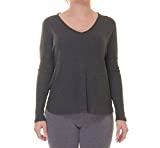

Product Title:  one clothing juniors thermalknit highlow tunic top size xl 
Euclidean Distance from input image: 36.53069
Amazon Url: www.amzon.com/dp/B06XNQ49FN


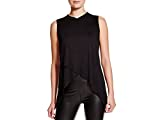

Product Title:  benjamin jay womens slider cross front tank black size small 
Euclidean Distance from input image: 36.722324
Amazon Url: www.amzon.com/dp/B071NBCMLT


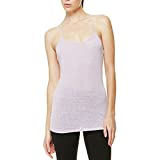

Product Title:  alo yoga racerback cami  womens moonstone marble l 
Euclidean Distance from input image: 36.915977
Amazon Url: www.amzon.com/dp/B00GLZWANI


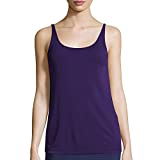

Product Title:  eileen fisher stretch silk long cami violet xs 
Euclidean Distance from input image: 37.17479
Amazon Url: www.amzon.com/dp/B01LY34YPS


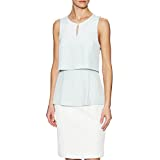

Product Title:  hunter bell womens nora layered silk tank top mint 4 
Euclidean Distance from input image: 37.320946
Amazon Url: www.amzon.com/dp/B01MSVTMWJ


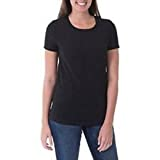

Product Title:  faded glory womens short sleeve crew neck tshirt black xlarge 
Euclidean Distance from input image: 37.590042
Amazon Url: www.amzon.com/dp/B06XHHTDRX


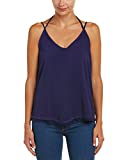

Product Title:  splendid womens double strap cami xl blue 
Euclidean Distance from input image: 37.61681
Amazon Url: www.amzon.com/dp/B0746STR6M


In [5]:
from IPython.display import display, Image, SVG, Math, YouTubeVideo

def get_similar_products_cnn(doc_id, num_results):
    doc_id = asins.index(df_asins[doc_id])
    pairwise_dist = pairwise_distances(bottleneck_features_train, bottleneck_features_train[doc_id].reshape(1,-1))

    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    for i in range(len(indices)):
        rows = data[['medium_image_url','title']].loc[data['asin']==asins[indices[i]]]
        for indx, row in rows.iterrows():
            display(Image(url=row['medium_image_url'], embed=True))
            print('Product Title: ', row['title'])
            print('Euclidean Distance from input image:', pdists[i])
            print('Amazon Url: www.amzon.com/dp/'+ asins[indices[i]])

get_similar_products_cnn(931, 10)

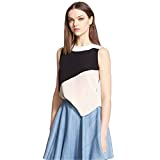

Product Title:  hunter bell womens paulie colorblock silk blouse gray 0 
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B01MXPMU80


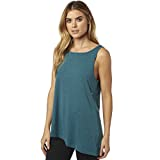

Product Title:  fox racing womens integrate tank shirt xsmall jade 
Euclidean Distance from input image: 40.278736
Amazon Url: www.amzon.com/dp/B01MZ77O2G


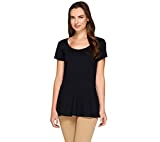

Product Title:  isaac mizrahi short slv peplum knit top a265193 black xs 
Euclidean Distance from input image: 40.583218
Amazon Url: www.amzon.com/dp/B074XDJ93X


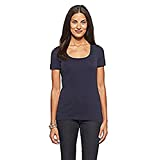

Product Title:  merona womens short sleeve ultimate scoop tee tshirt  xavier navy blue  large 
Euclidean Distance from input image: 40.819386
Amazon Url: www.amzon.com/dp/B07251GV8H


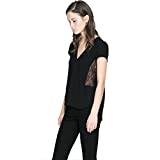

Product Title:  sexy summer vneck tshirts black blouse bky12store2029 
Euclidean Distance from input image: 41.38139
Amazon Url: www.amzon.com/dp/B013GRWE84


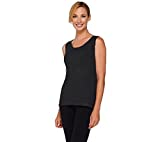

Product Title:  linea louis dellolio whisper knit scoop neck tank a237404 heather grey 2x 
Euclidean Distance from input image: 41.414158
Amazon Url: www.amzon.com/dp/B073WG419T


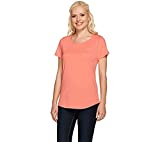

Product Title:  liz claiborne ny essentials short slv tee pocket a264117 flamingo l 
Euclidean Distance from input image: 41.581844
Amazon Url: www.amzon.com/dp/B074WL4F5F


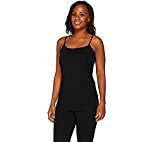

Product Title:  liz claiborne ny essentials scoop neck camisole a264114 black 2x 
Euclidean Distance from input image: 41.602463
Amazon Url: www.amzon.com/dp/B074WKW41H


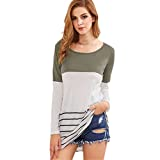

Product Title:  sankuwen women lace back color block spliced striped shirts white 
Euclidean Distance from input image: 41.754845
Amazon Url: www.amzon.com/dp/B06WW3LPR5


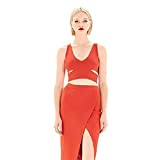

Product Title:  ronny kobo padma top large vermillion 
Euclidean Distance from input image: 41.92833
Amazon Url: www.amzon.com/dp/B013KPHI42


In [6]:
get_similar_products_cnn(1000, 10)

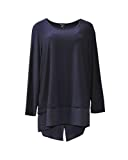

Product Title:  conrad c womens nightfall matte jersey georgette hem plus sz 2x ink 270004e 
Euclidean Distance from input image: 0.0
Amazon Url: www.amzon.com/dp/B07588PRJF


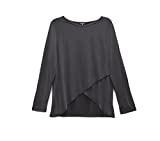

Product Title:  drew womens maya cross long sleeve top sz xl charcoal 270015e 
Euclidean Distance from input image: 27.241114
Amazon Url: www.amzon.com/dp/B0745K595G


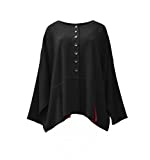

Product Title:  sophia nyc womens stretch crepe button front top jacket sz 2x black 270000e 
Euclidean Distance from input image: 28.679037
Amazon Url: www.amzon.com/dp/B07522YS8B


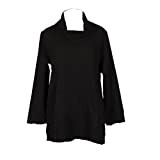

Product Title:  focus womens fw111 mock neck top xlarge black 
Euclidean Distance from input image: 29.776985
Amazon Url: www.amzon.com/dp/B015GIEYCK


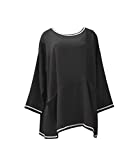

Product Title:  sophia nyc womens stretch jersey asymmetric tunic sz 1x black 280114e 
Euclidean Distance from input image: 29.797321
Amazon Url: www.amzon.com/dp/B072KWRDWD


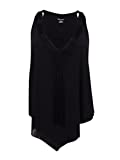

Product Title:  black macrame fringe plus size top  size 14  xs 
Euclidean Distance from input image: 30.023293
Amazon Url: www.amzon.com/dp/B071JZB9PJ


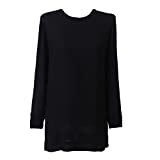

Product Title:  richie house womens long sleeve chiffon blouse uni sl rhw2112bsl 
Euclidean Distance from input image: 30.348892
Amazon Url: www.amzon.com/dp/B00SC7WOAM


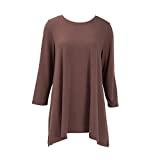

Product Title:  mountain mamas essential tunic  french roast  sm 
Euclidean Distance from input image: 30.907307
Amazon Url: www.amzon.com/dp/B074JH922V


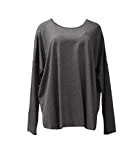

Product Title:  integrity womens long sleeve sized knit top sz ml black heather 260986e 
Euclidean Distance from input image: 30.999573
Amazon Url: www.amzon.com/dp/B0741SSXD5


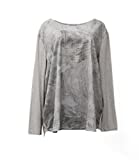

Product Title:  basler womens long sleeve metallic print tee sz 20 greygreen 270008e 
Euclidean Distance from input image: 31.311045
Amazon Url: www.amzon.com/dp/B0741TQS32


In [7]:
get_similar_products_cnn(1500, 10)